In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

df = pd.read_csv('가격_수출입_경제지표_240728.csv')
df['index'] = pd.to_datetime(df['index'], format='%Y-%m')
df = df.set_index('index', drop=True)  # 기존 컬럼 제거

# 경로 설정
plt.rc("font", family="AppleGothic") 

In [2]:
df.columns

Index(['감귤_소매가_상품_10개', '감귤_ 소매가_중품_10개', '감귤_중도매가_상품_1kg', '감귤_중도매가_중품_1kg',
       '단감_소매가_상품_10개', '단감_소매가_중품_10개', '단감_중도매가_상품_1kg', '단감_중도매가_중품_1kg',
       '망고_소매가격_수입_상품_1개', '망고_소매가_중품_1개',
       ...
       '수입액_복숭아', '수입량_단감', '수입량_바나나', '수입량_배', '수입량_복숭아', '무역수지_감귤', '수출액_감귤',
       '수출량_감귤', '수입액_감귤', '수입량_감귤'],
      dtype='object', length=132)

In [97]:
df.head()

,감귤_소매가_상품_10개,감귤_ 소매가_중품_10개,감귤_중도매가_상품_1kg,감귤_중도매가_중품_1kg,단감_소매가_상품_10개,단감_소매가_중품_10개,단감_중도매가_상품_1kg,단감_중도매가_중품_1kg,망고_소매가격_수입_상품_1개,망고_소매가_중품_1개,망고_중도매가_수입_상품_1kg,망고_중도매가_수입_중품_1kg,바나나 _소매가격_수입_상품_1kg,바나나_소매가격_수입_중품_1kg,바나나_중도매가_수입_상품_1kg,바나나_중도매가_수입_중품_1kg,배_소매가_신고_상품_10개,배_소매가_신고_중품_10개,배_중도매가_신고_상품_1kg,배_중도매가_신고_중품_1kg,복숭아_소매가격_백도_상품_10개,복숭아_소매가격_백도_중품_10개,복숭아_중도매가_백도_상품_1kg,복숭아_중도매가_백도_중품_1kg,사과_소매가격_후지_10개,사과_중도매가_후지_상품_1kg,사과_소매가_후지_중품_10개,사과_중도매가_후지_중품_1kg,오렌지_소매가격_수입_상품_10개,오렌지_소매가격_수입_중품_10개,오렌지_중도매가_ 수입_상품_1kg,오렌지_중도매가_수입_중품_1kg,자몽_소매가_수입_상품_10개,자몽_소매가_수입_중품_10개,파인애플_소매가_수입_상품_1개,파인애플_소매가_수입_중품_1개,파인애플_중도매가_수입_상품_1kg,파인애플_중도매가_수입_중품_1kg,포도_소매가_캠벨얼리_L과_1kg,포도_소매가_캠벨얼리_M과_1kg,포도_중도매가_캠벨얼리_L과_1kg,포도_중도매가_캠벨얼리_M과_1kg,포도_소매가_샤인머스켓_L과_1kg,포도_소매가_샤인머스켓_M과_1kg,포도_중도매가_샤인머스켓_L과_1kg,포도_중도매가_샤인머스켓_M과_1kg,아보카도_소매가격_수입_상품1개,생산자물가지수_총지수(2020=100),생산자물가지수_사과(2020=100),생산자물가지수_배(2020=100),생산자물가지수_복숭아(2020=100),생산자물가지수_포도(2020=100),생산자물가지수_감귤(2020=100),생산자물가지수_감(2020=100),소비자물가지수_총지수(2020=100),소비자물가지수_사과(2020=100),소비자물가지수_배(2020=100),소비자물가지수_복숭아(2020=100),소비자물가지수_포도(2020=100),소비자물가지수_감(2020=100),소비자물가지수_귤(2020=100),소비자물가지수_오렌지(2020=100),소비자물가지수_바나나(2020=100),소비자물가지수_망고(2020=100),소비자물가지수_아보카도(2020=100),소비자물가지수_파인애플(2020=100),수입물가지수_과일(2020=100),월달러환율(KRW),한국기준금리(%),세계식량물가지수_중간값(2015=100),세계식량물가상승률_중간값(%),세계식량물가상승률_가중평균(%),무역수지_망고,무역수지_사과,무역수지_아보카도,무역수지_오렌지,무역수지_자몽,무역수지_파인애플,무역수지_포도,수출액_망고,수출액_사과,수출액_아보카도,수출액_오렌지,수출액_자몽,수출액_파인애플,수출액_포도,수출량_망고,수출량_사과,수출량_아보카도,수출량_오렌지,수출량_자몽,수출량_파인애플,수출량_포도,수입액_망고,수입액_사과,수입액_아보카도,수입액_오렌지,수입액_자몽,수입액_파인애플,수입액_포도,수입량_망고,수입량_사과,수입량_아보카도,수입량_오렌지,수입량_자몽,수입량_파인애플,수입량_포도,무역수지_단감,무역수지_바나나,무역수지_배,무역수지_복숭아,수출액_단감,수출액_바나나,수출액_배,수출액_복숭아,수출량_단감,수출량_바나나,수출량_배,수출량_복숭아,수입액_단감,수입액_바나나,수입액_배,수입액_복숭아,수입량_단감,수입량_바나나,수입량_배,수입량_복숭아,무역수지_감귤,수출액_감귤,수출량_감귤,수입액_감귤,수입량_감귤
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,2726.0,1819.0,1914.0,1514.0,11408.0,8318.0,3467.0,2933.0,NaN,NaN,NaN,NaN,2010,1270,1100,1000,28793,20763,3514,2714,NaN,NaN,NaN,NaN,28190.0,6175.0,14285.0,4175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.28,173.08,83.26,-,-,117.50,94.84,88.288,95.599,89.995,118.482,98.312,85.213,75.376,118.110,58.717,-,-,-,94.33,1119.25,2.75,86.5,4.630197,4.529574,-361503.0,212174.0,-72064.0,-9313256.0,-1062983.0,-3516594.0,-1333426.0,0.0,240633.0,0.0,0.0,0.0,0.0,0.0,0.0,107333.0,0.0,0.0,0.0,0.0,0.0,361503.0,28459.0,72064.0,9313256.0,1062983.0,3516594.0,1333426.0,73708.0,12600.0,17197.0,7005168.0,860359.0,5558484.0,344273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,2993.0,1735.0,1541.0,1196.0,10320.0,8760.0,3702.0,3169.0,NaN,NaN,NaN,NaN,2220,1580,1402,1285,29389,20941,3776,3000,NaN,NaN,NaN,NaN,29000.0,6275.0,14063.0,4333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.03,169.85,92.77,-,-,93.41,96.42,88.892,97.446,92.752,118.482,98.312,89.162,73.684,108.231,63.922,-,-,-,92.99,1124.65,2.75,87.1,5.230132,4.793995,-442042.0,-5380.0,-179448.0,-21208859.0,-520146.0,-2575379.0,-11872196.0,0.0,47927.0,0.0,2151.0,0.0,0.0,4905.0,0.0,25548.0,0.0,915.0,0.0,0.0,824.0,442042.0,53307.0,179448.0,21211010.0,520146.0,2575379.0,11877101.0,87380.0,25275.0,34858.0,17580485.0,411794.0,4688323.0,3280452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,2487.0,1692.0,1606.0,1287.0,9790.0,8161.0,3828.0,3335.0,NaN,NaN,NaN,NaN,2270,1810,1574,1470,29624,19992,3701,3017,NaN,NaN,NaN,NaN,24391.0,5949.0,13611.0,4261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.24,159.63,90.51,-,-,91.56,96.63,89.238,95.840,92.752,118.482,98.312,89.010,77.590,105.789,68.850,-,-,-,95.72,1095.50,3.00,87.6,5.407971,4.963879,-564919.0,38211.0,-105860.0,-52844772.0,-1188416.0,-4485447.0,-26779970.0,0.0,94744.0,0.0,480.0,0.0,0.0,0.0,0.0,34810.0,0.0,90.

In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_top_correlated_heatmap(df, threshold=0.5, top_n=10, date_col='index', date_format='%Y-%m'):
    """
    상관계수 행렬의 절대값이 주어진 임계값 이상인 상위 N개의 컬럼만 포함하고, 
    상관계수 행렬의 절반만을 표시하는 히트맵을 그리는 함수.
    
    Parameters:
    - df: 입력 데이터프레임
    - threshold: 상관계수 임계값 (기본값: 0.5)
    - top_n: 상위 N개의 컬럼 (기본값: 10)
    - date_col: 날짜 컬럼명 (기본값: 'index')
    - date_format: 날짜 형식 (기본값: '%Y-%m')
    """
    
    # 상관관계 행렬 계산
    correlation_matrix = df.corr()
    
    # 절대값이 주어진 임계값 이상인 상관계수만 남기기
    filtered_correlation_matrix = correlation_matrix.where(abs(correlation_matrix) >= threshold)
    
    # 상위 N개의 컬럼 선택
    cols = filtered_correlation_matrix.abs().unstack().sort_values(ascending=False).dropna().index
    top_cols = set()
    for col1, col2 in cols:
        if len(top_cols) >= top_n:
            break
        top_cols.add(col1)
        top_cols.add(col2)
    filtered_correlation_matrix = filtered_correlation_matrix.loc[top_cols, top_cols]
    
    # 상관관계 행렬의 절반만 남기기 위한 마스크 생성
    mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, cbar_kws={"shrink": .75})
    plt.title(f'Top {top_n} Correlated Features Heatmap')
    plt.show()


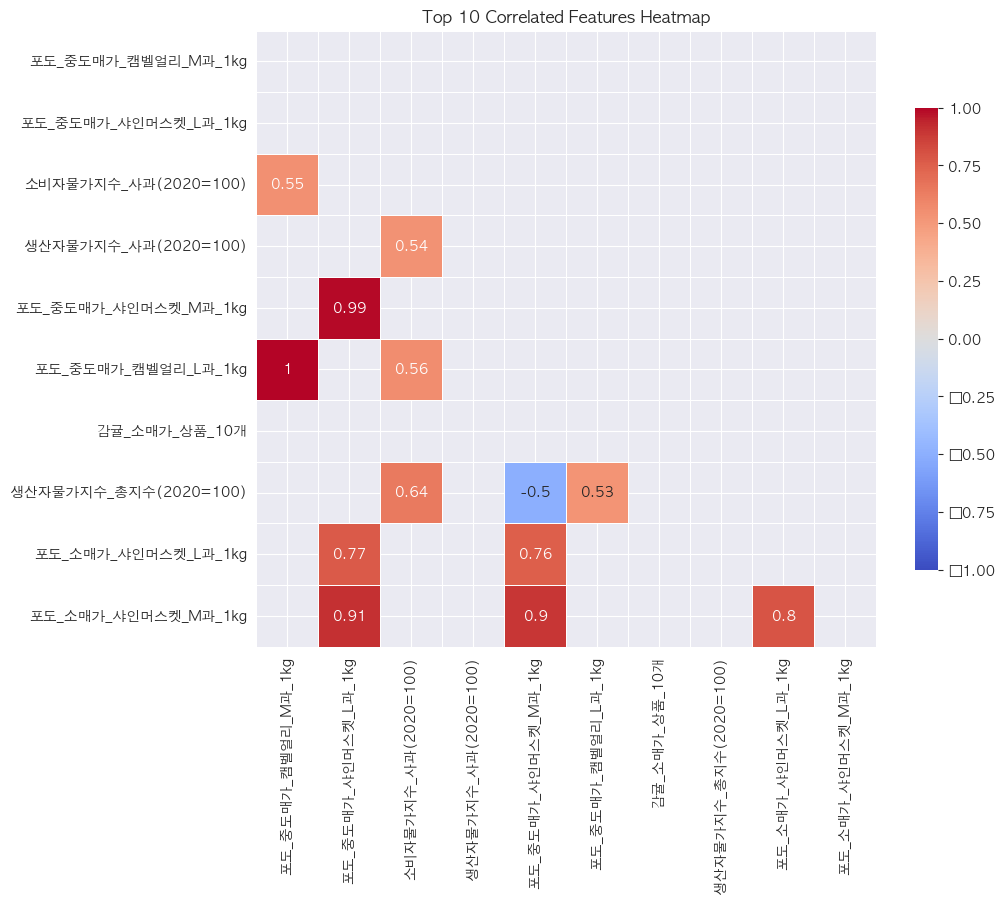

In [99]:
# 함수 호출
plot_top_correlated_heatmap(df, threshold=0.5, top_n=10)

In [104]:
# 경로 설정
plt.rc("font", family="AppleGothic") 

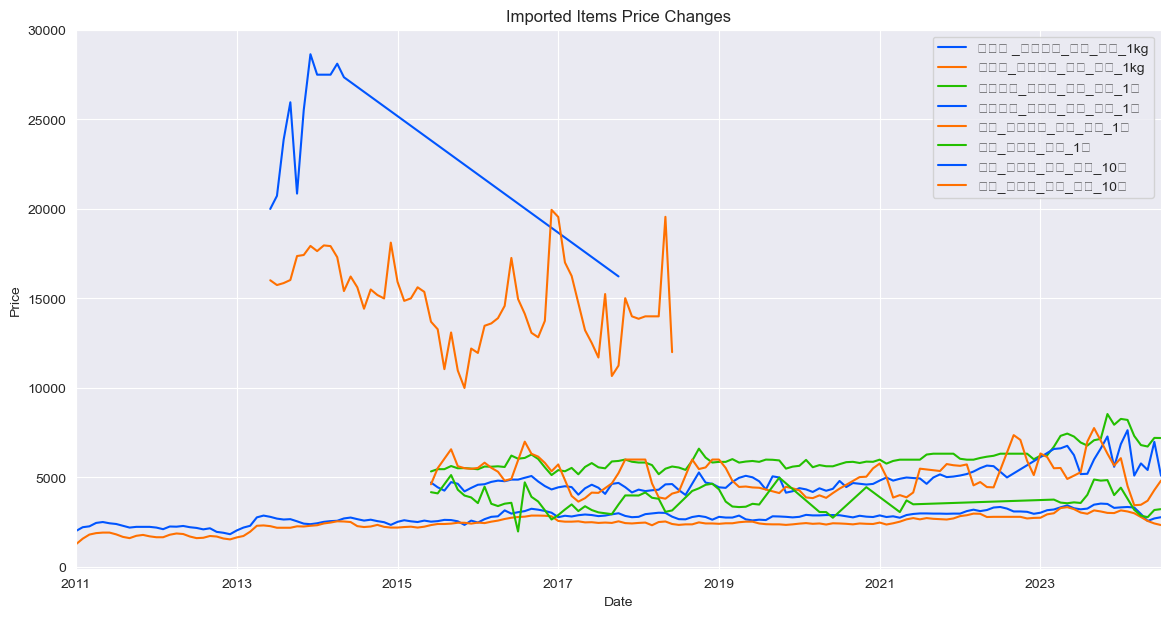

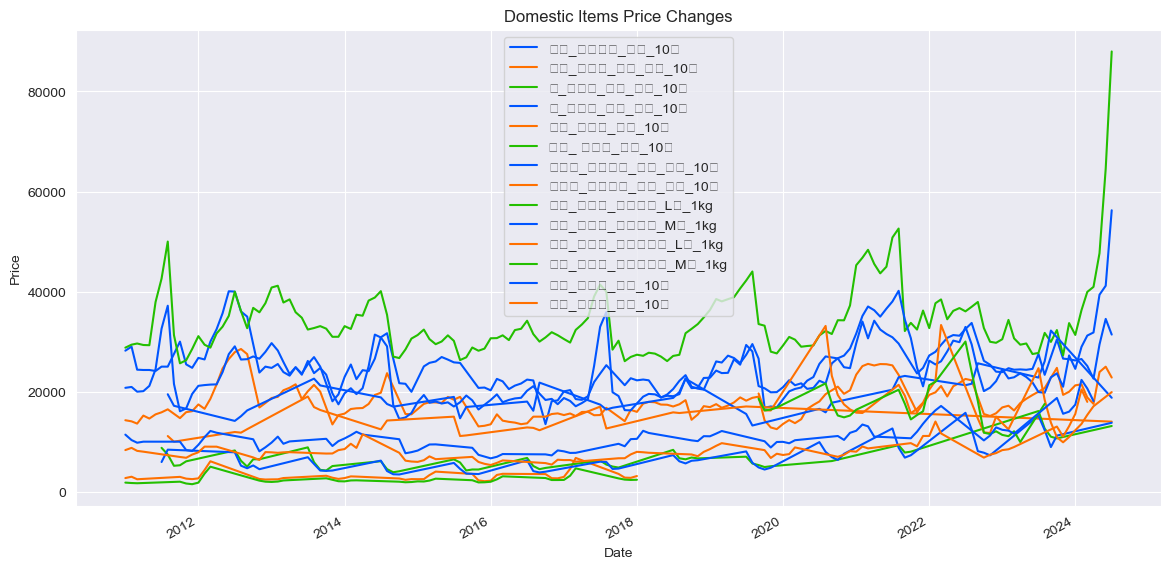

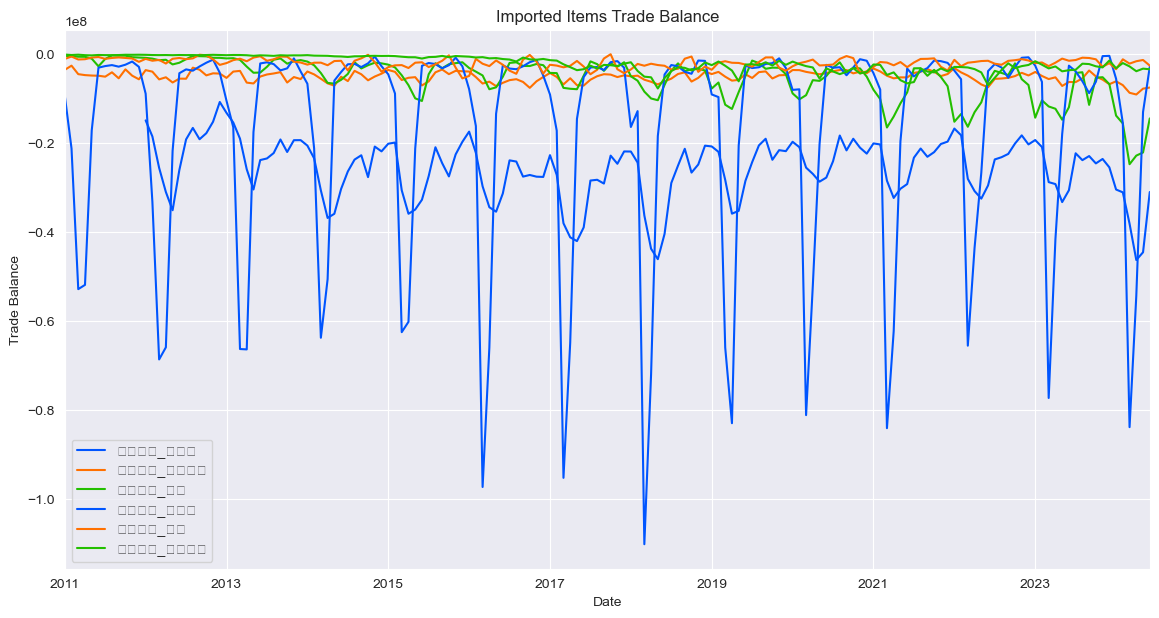

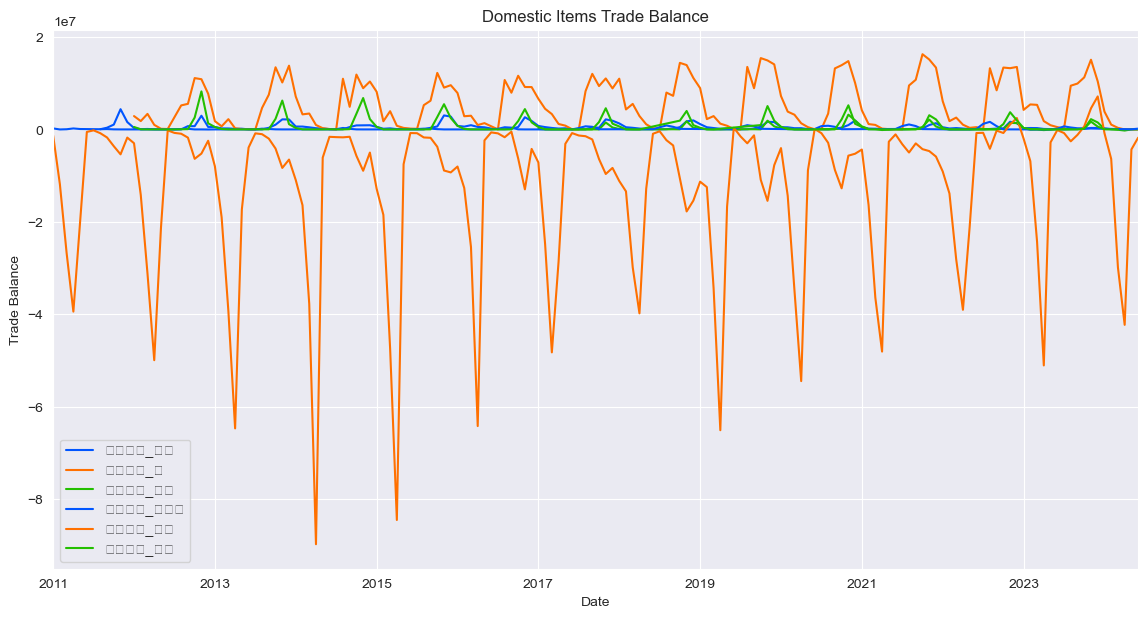

No valid columns found for Imported Items Price Index Changes (생산자물가지수)


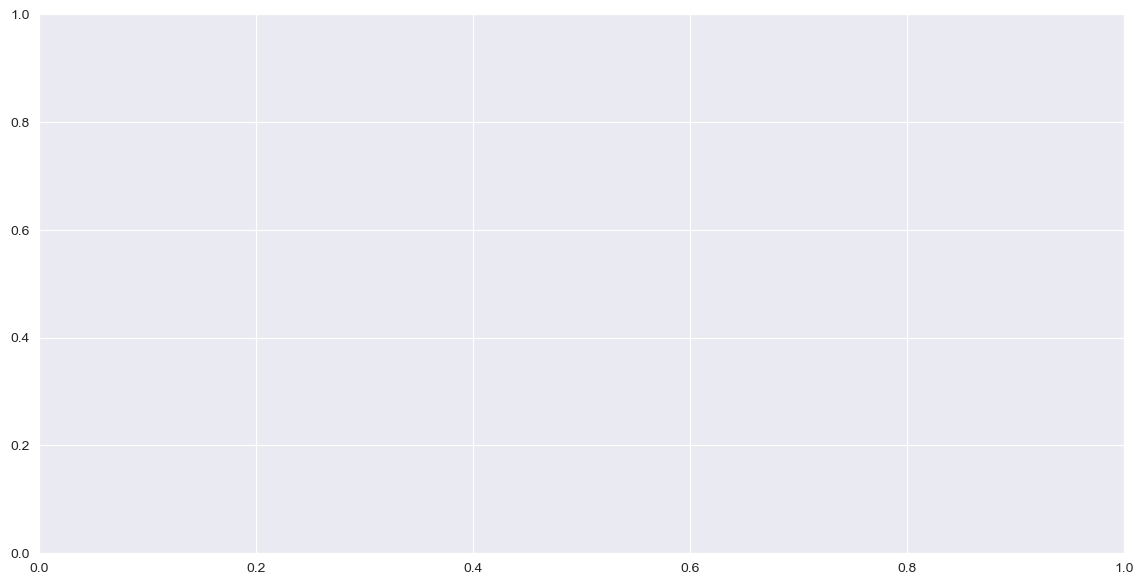

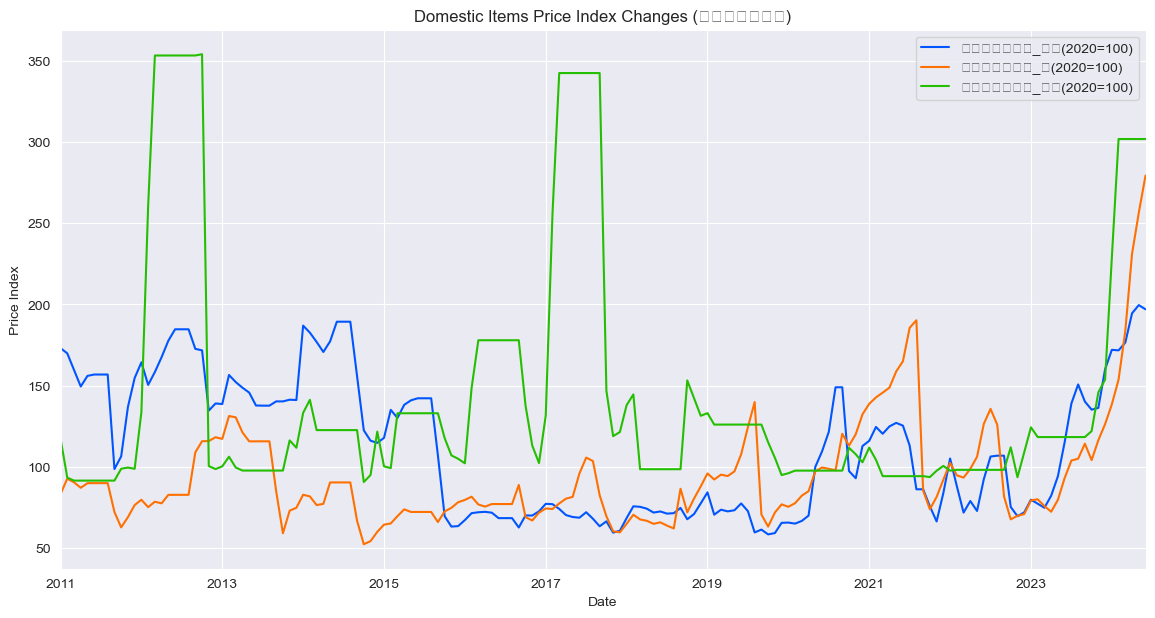

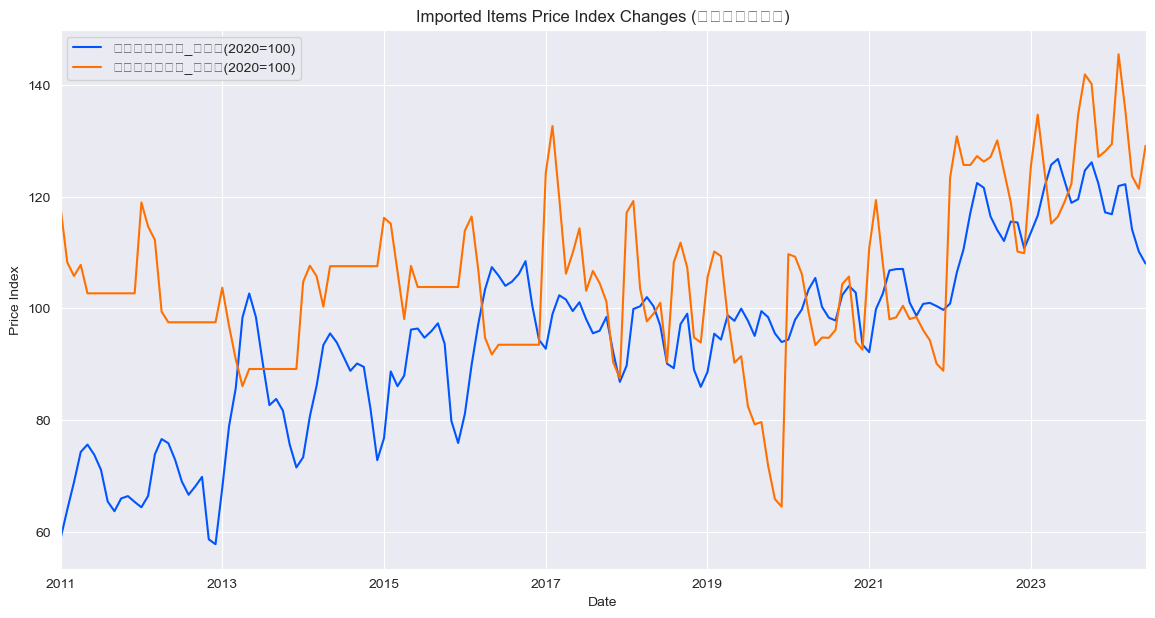

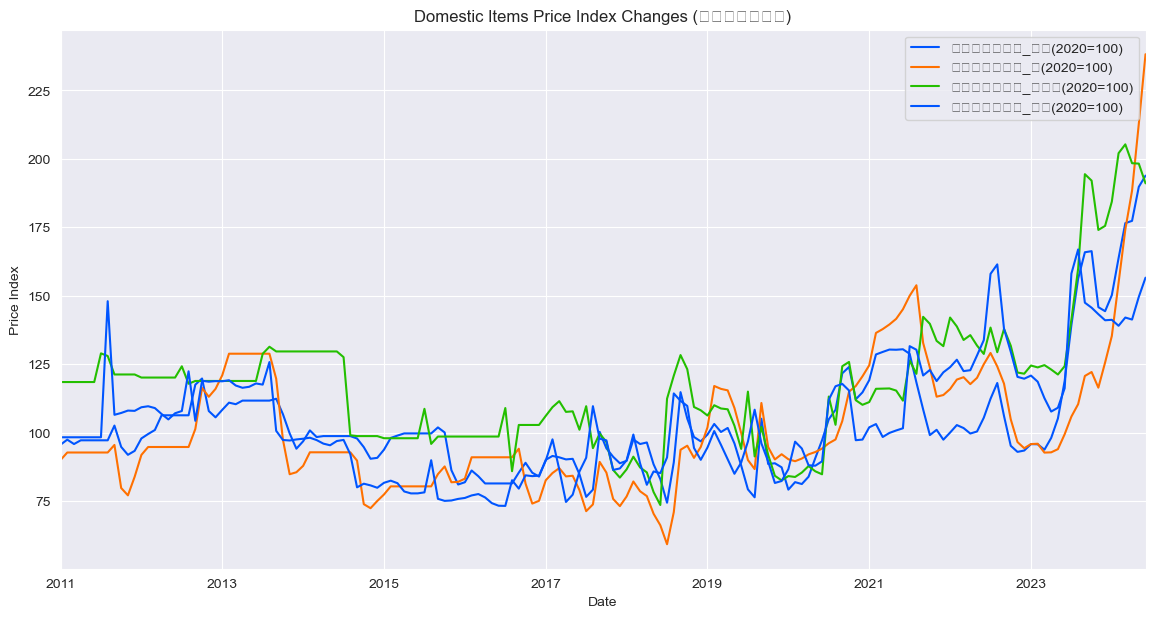

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# 숫자 데이터가 아닌 열 필터링
numeric_df = df.select_dtypes(include=[float, int])

# 수입 품목과 국내 생산 품목 리스트
import_items = ['바나나', '파인애플', '망고', '오렌지', '자몽', '아보카도']
domestic_items = ['사과', '배', '감귤', '복숭아', '포도', '단감']

# 유효한 데이터를 가진 열만 선택
def get_valid_columns(df, items, keyword):
    valid_columns = []
    for item in items:
        columns = [col for col in df.columns if item in col and keyword in col]
        for column in columns:
            if df[column].dropna().shape[0] > 0:  # 데이터가 있는지 확인
                valid_columns.append(column)
    return valid_columns

# 가격 변화 분석
def plot_price_changes(df, items, title):
    fig, ax = plt.subplots(figsize=(14, 7))
    valid_columns = get_valid_columns(df, items, '소매가')
    if not valid_columns:
        print(f"No valid columns found for {title}")
        return
    for column in valid_columns:
        df[column].dropna().plot(ax=ax, label=column)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()

plot_price_changes(numeric_df, import_items, 'Imported Items Price Changes')
plot_price_changes(numeric_df, domestic_items, 'Domestic Items Price Changes')

# 무역수지 변화 분석
def plot_trade_balance(df, items, title):
    fig, ax = plt.subplots(figsize=(14, 7))
    valid_columns = get_valid_columns(df, items, '무역수지')
    if not valid_columns:
        print(f"No valid columns found for {title}")
        return
    for column in valid_columns:
        df[column].dropna().plot(ax=ax, label=column)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Trade Balance')
    ax.legend()
    plt.show()

plot_trade_balance(numeric_df, import_items, 'Imported Items Trade Balance')
plot_trade_balance(numeric_df, domestic_items, 'Domestic Items Trade Balance')

# 물가지수 변화 분석
def plot_price_indices(df, items, title, index_type='생산자물가지수'):
    fig, ax = plt.subplots(figsize=(14, 7))
    valid_columns = get_valid_columns(df, items, index_type)
    if not valid_columns:
        print(f"No valid columns found for {title} ({index_type})")
        return
    for column in valid_columns:
        df[column].dropna().plot(ax=ax, label=column)
    ax.set_title(f'{title} ({index_type})')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price Index')
    ax.legend()
    plt.show()

plot_price_indices(numeric_df, import_items, 'Imported Items Price Index Changes', '생산자물가지수')
plot_price_indices(numeric_df, domestic_items, 'Domestic Items Price Index Changes', '생산자물가지수')
plot_price_indices(numeric_df, import_items, 'Imported Items Price Index Changes', '소비자물가지수')
plot_price_indices(numeric_df, domestic_items, 'Domestic Items Price Index Changes', '소비자물가지수')


### 가설 1: 수입 과일 가격이 국내 과일 가격에 영향을 미친다

In [101]:
# 숫자 데이터가 아닌 열 필터링
numeric_df = df.select_dtypes(include=[float, int])

# 수입 품목과 국내 생산 품목 리스트
import_items = ['바나나', '파인애플', '망고', '오렌지', '자몽', '아보카도']
domestic_items = ['사과', '배', '감귤', '복숭아', '포도', '단감']

# 유효한 데이터를 가진 열만 선택하는 함수
def get_valid_columns(df, items, keyword):
    valid_columns = []
    for item in items:
        columns = [col for col in df.columns if item in col and keyword in col]
        for column in columns:
            if df[column].dropna().shape[0] > 0:  # 데이터가 있는지 확인
                valid_columns.append(column)
    return valid_columns

# 가격 변화 분석을 위해 유효한 소매가 열을 선택
import_price_columns = get_valid_columns(numeric_df, import_items, '소매가')
domestic_price_columns = get_valid_columns(numeric_df, domestic_items, '소매가')

# 가설 1: 수입 과일 가격이 국내 과일 가격에 영향을 미친다
# 상관관계 분석을 통해 수입 과일 가격과 국내 과일 가격 간의 관계를 살펴볼 수 있습니다.

import numpy as np

# 상관관계 분석
correlation_matrix = numeric_df[import_price_columns + domestic_price_columns].corr()

# 수입 과일과 국내 과일 간의 상관관계만 선택
correlation_import_domestic = correlation_matrix.loc[import_price_columns, domestic_price_columns]
correlation_import_domestic

import pandas as pd

# 상관계수 0.5 이상만 선택하는 함수
def filter_high_correlations(correlation_df, threshold=0.5):
    high_corr = correlation_df[correlation_df.abs() >= threshold]
    return high_corr

# 상관관계 행렬에서 수입 과일과 국내 과일 간의 상관계수만 선택
correlation_import_domestic = correlation_matrix.loc[import_price_columns, domestic_price_columns]

# 상관계수 0.5 이상인 항목만 선택
high_correlations = filter_high_correlations(correlation_import_domestic)
high_correlations


,사과_소매가격_후지_10개,사과_소매가_후지_중품_10개,배_소매가_신고_상품_10개,배_소매가_신고_중품_10개,감귤_소매가_상품_10개,감귤_ 소매가_중품_10개,복숭아_소매가격_백도_상품_10개,복숭아_소매가격_백도_중품_10개,포도_소매가_캠벨얼리_L과_1kg,포도_소매가_캠벨얼리_M과_1kg,포도_소매가_샤인머스켓_L과_1kg,포도_소매가_샤인머스켓_M과_1kg,단감_소매가_상품_10개,단감_소매가_중품_10개
바나나 _소매가격_수입_상품_1kg,NaN,NaN,NaN,NaN,NaN,NaN,0.637616,NaN,NaN,NaN,NaN,NaN,0.533318,NaN
바나나_소매가격_수입_중품_1kg,NaN,NaN,NaN,NaN,NaN,NaN,0.588512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
파인애플_소매가_수입_상품_1개,NaN,NaN,NaN,NaN,NaN,NaN,0.652506,NaN,0.766496,0.627847,NaN,NaN,0.761129,0.769676
파인애플_소매가_수입_중품_1개,NaN,NaN,NaN,NaN,NaN,NaN,0.710070,NaN,0.503005,NaN,-0.503253,NaN,0.719127,0.720039
망고_소매가격_수입_상품_1개,NaN,NaN,NaN,NaN,-0.747937,-0.734983,0.686593,-0.892882,NaN,NaN,NaN,NaN,NaN,NaN
망고_소매가_중품_1개,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.531815,0.673798,NaN,NaN
자몽_소매가_수입_상품_10개,NaN,-0.559471,NaN,NaN,-0.862908,-0.902969,-1.000000,-0.979553,NaN,NaN,NaN,NaN,NaN,0.688612
자몽_소매가_수입_중품_10개,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 가설 3: 수입 과일의 소비자 물가지수가 국내 과일의 생산자 물가지수에 영향을 미친다
- 회귀분석

In [102]:
# 유효한 소비자 물가지수와 생산자 물가지수 열 선택
import_cpi_columns = get_valid_columns(numeric_df, import_items, '소비자물가지수')
domestic_ppi_columns = get_valid_columns(numeric_df, domestic_items, '생산자물가지수')

In [103]:
# 회귀 분석
for domestic_ppi in domestic_ppi_columns:
    X = numeric_df[import_cpi_columns].dropna()
    y = numeric_df[domestic_ppi].loc[X.index]
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    print(f"Regression analysis for {domestic_ppi}:\n", model.summary())

Regression analysis for 생산자물가지수_사과(2020=100):
                              OLS Regression Results                             
Dep. Variable:     생산자물가지수_사과(2020=100)   R-squared:                       0.224
Model:                              OLS   Adj. R-squared:                  0.214
Method:                   Least Squares   F-statistic:                     22.93
Date:                  Mon, 29 Jul 2024   Prob (F-statistic):           1.78e-09
Time:                          20:19:59   Log-Likelihood:                -814.27
No. Observations:                   162   AIC:                             1635.
Df Residuals:                       159   BIC:                             1644.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

- 사과 생산자 물가지수
    - 소비자물가지수_바나나는 유의미한 음의 영향 (즉, 바나나 물가지수가 상승하면 사과 생산자 물가지수는 감소).
    - 소비자물가지수_오렌지는 유의미한 양의 영향 (즉, 오렌지 물가지수가 상승하면 사과 생산자 물가지수는 증가).
- 배 생산자 물가지수
    - 소비자물가지수_바나나는 유의미한 양의 영향 (즉, 바나나 물가지수가 상승하면 배 생산자 물가지수도 상승).
    - 소비자물가지수_오렌지는 통계적으로 유의미한 영향을 미치지 않음 
- 감귤 생산자 물가지수
    - 소비자물가지수_오렌지는 유의미한 양의 영향 (즉, 오렌지 물가지수가 상승하면 감귤 생산자 물가지수도 상승).
    - 소비자물가지수_바나나는 통계적으로 유의미한 영향을 미치지 않음

=> 특정 수입 과일의 소비자 물가지수는 일부 국내 과일의 생산자 물가지수에 유의미한 영향을 미친다